# Level-3

### Load and Explore Data

In [15]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

# Download the stopwords dataset
nltk.download('stopwords')
nltk.download('punkt')


# Load the dataset
file_path = "C:\\Users\\Admin\\OneDrive\\Documents\\Cognifyz-DataAnalysis\\Dataset .csv"  
df = pd.read_csv(file_path)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
# Display the first few rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [17]:
# Get summary statistics
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [18]:
# Check for missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [20]:
#checking duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

# Level 3:Task 1

### Task: Restaurant Reviews

a) Analyze the text reviews to identify the most common positive and negative keywords.

In [27]:
column_name = 'Rating text' 
# Get distinct rows
distinct_rows = df[column_name].drop_duplicates()

print(distinct_rows)


0      Excellent
2      Very Good
15          Good
22       Average
30     Not rated
312         Poor
Name: Rating text, dtype: object


In [34]:
def categorize(value):
    positive_reviews = {"excellent", "good", "very good"}
    negative_reviews = {"average", "poor", "not rated"}

    value_lower = value.lower()  # Convert to lowercase for case-insensitive comparison

    if value_lower in positive_reviews:
        return 'positive'
    elif value_lower in negative_reviews:
        return 'negative'
    else:
        return 'unknown'  # For any values that don't match either category
# Categorize the distinct rows
categorized_rows = distinct_rows.apply(categorize)

In [35]:
positive_rows = distinct_rows[categorized_rows == 'positive']
negative_rows = distinct_rows[categorized_rows == 'negative']

# Display the results
print("Positive reviews:")
print(positive_rows)

print("\nNegative reviews:")
print(negative_rows)
# Filter out unknown categories if any
review_counts = review_counts[review_counts.index != 'unknown']


Positive reviews:
0     Excellent
2     Very Good
15         Good
Name: Rating text, dtype: object

Negative reviews:
22       Average
30     Not rated
312         Poor
Name: Rating text, dtype: object


b) Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [44]:
df[["Rating text","Aggregate rating"]]
def find_len(txt):
    ratings=len(txt)
    return ratings
df["Review_length"]=df["Rating text"].apply(find_len)
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Processed Reviews,Review Length,Review_length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,3,4.8,Dark Green,Excellent,314,[excellent],1,9
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,3,4.5,Dark Green,Excellent,591,[excellent],1,9
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,4,4.4,Green,Very Good,270,[good],1,9


In [46]:
df[["Rating text","Review_length"]].value_counts()

# Calculate the average length of reviews
average_review_length = df['Review_length'].mean()
print(f"The average length of reviews is: {average_review_length:.2f} words")


The average length of reviews is: 7.02 words


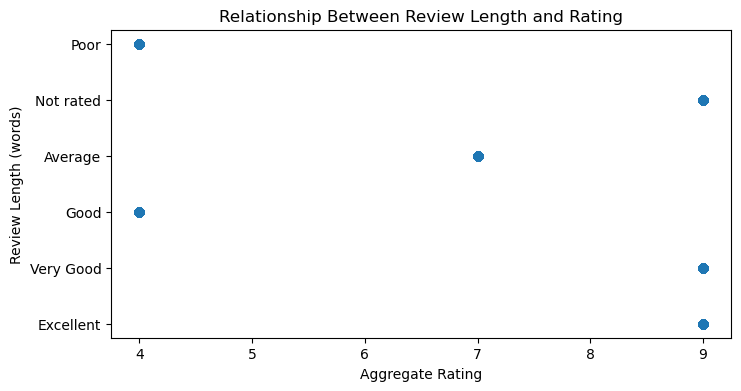

The correlation between review length and rating is: -0.33


In [56]:
rating_map = {
    'Excellent': 5,
    'Very Good': 4,
    'Good': 3,
    'Average': 2,
    'Poor': 1,
    'Not rated': 0  
}

df['Rating numeric'] = df['Rating text'].map(rating_map)
# Plot the relationship between review length and rating
plt.figure(figsize=(8, 4))
plt.scatter(df['Review_length'], df['Rating text'], alpha=0.5)
plt.title('Relationship Between Review Length and Rating')
plt.ylabel('Review Length (words)')
plt.xlabel('Aggregate Rating')
plt.show()

# Calculate the correlation between review length and rating
correlation = df[['Review_length', 'Rating numeric']].corr().iloc[0, 1]
print(f"The correlation between review length and rating is: {correlation:.2f}")

# Level 3:Task 2

### Task: Votes Analysis

a) Identify the restaurants with the highest and lowest number of votes.

In [57]:
# Identify the restaurant with the highest number of votes
max_votes = df['Votes'].max()
restaurant_max_votes = df[df['Votes'] == max_votes]
print("Restaurant with the highest number of votes:")
print(restaurant_max_votes[['Restaurant Name', 'Votes']])

# Identify the restaurant with the lowest number of votes
min_votes = df['Votes'].min()
restaurant_min_votes = df[df['Votes'] == min_votes]
print("\nRestaurant with the lowest number of votes:")
print(restaurant_min_votes[['Restaurant Name', 'Votes']])


Restaurant(s) with the highest number of votes:
    Restaurant Name  Votes
728            Toit  10934

Restaurant(s) with the lowest number of votes:
                 Restaurant Name  Votes
69              Cantinho da Gula      0
874                The Chaiwalas      0
879           Fusion Food Corner      0
880                Punjabi Rasoi      0
887                Baskin Robbin      0
...                          ...    ...
9044               6 Packs Momos      0
9098                   Cafe' Wow      0
9099  Chef's Basket Pop Up Caf��      0
9103            The Hangout-Deli      0
9111                    Platters      0

[1094 rows x 2 columns]


b) Analyze if there is a correlation between the number of votes and the rating of a restaurant.


The correlation between the number of votes and the rating is: 0.31


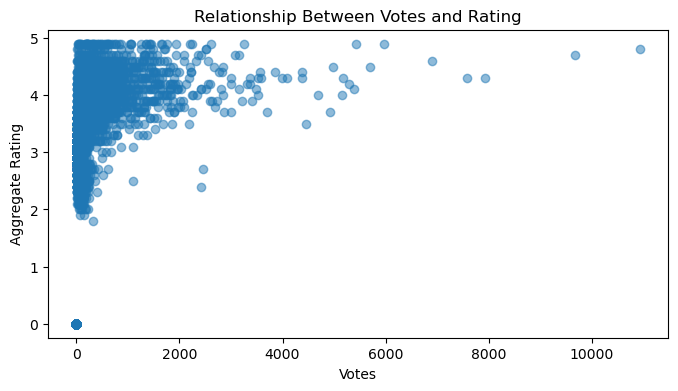

In [63]:
# Analyze the correlation between the number of votes and the rating of a restaurant
if 'Aggregate rating' in df.columns:
    correlation_votes_rating = df[['Votes', 'Aggregate rating']].corr().iloc[0, 1]
    print(f"\nThe correlation between the number of votes and the rating is: {correlation_votes_rating:.2f}")

    # Plot the relationship between votes and rating
    plt.figure(figsize=(8, 4))
    plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5)
    plt.title('Relationship Between Votes and Rating')
    plt.xlabel('Votes')
    plt.ylabel('Aggregate Rating')
    plt.show()


# Level 3:Task 3

### Task: Price Range vs. Online Delivery and Table Booking

a) Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [64]:
# Convert the 'Has Online delivery' and 'Has Table booking' columns to binary (0 and 1)
df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
df['Has Table booking'] = df['Has Table booking'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Analyze the relationship between price range and the availability of online delivery and table booking
online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].mean() * 100
table_booking_by_price = df.groupby('Price range')['Has Table booking'].mean() * 100

print("Percentage of restaurants offering online delivery by price range:")
print(online_delivery_by_price)

print("\nPercentage of restaurants offering table booking by price range:")
print(table_booking_by_price)

Percentage of restaurants offering online delivery by price range:
Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64

Percentage of restaurants offering table booking by price range:
Price range
1     0.022502
2     7.677482
3    45.738636
4    46.757679
Name: Has Table booking, dtype: float64


b) Determine if higher-priced restaurants are more likely to offer these services.

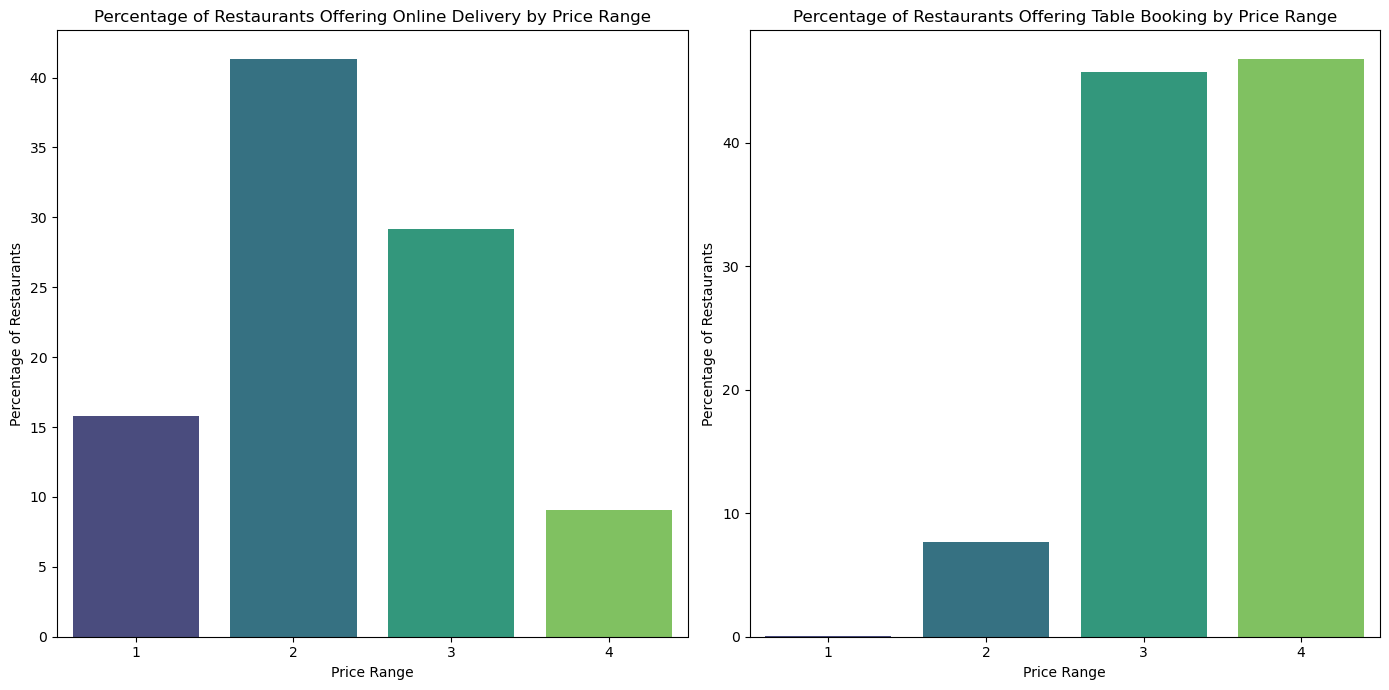


Higher-priced restaurants are more likely to offer online delivery and table booking if the percentage increases with the price range.


In [69]:
# Plot the relationship
plt.figure(figsize=(14, 7))
# Online delivery plot
plt.subplot(1, 2, 1)
sns.barplot(x=online_delivery_by_price.index, y=online_delivery_by_price.values, palette='viridis')
plt.title('Percentage of Restaurants Offering Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')

# Table booking plot
plt.subplot(1, 2, 2)
sns.barplot(x=table_booking_by_price.index, y=table_booking_by_price.values, palette='viridis')
plt.title('Percentage of Restaurants Offering Table Booking by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')

plt.tight_layout()
plt.show()

print("\nHigher-priced restaurants are more likely to offer online delivery and table booking if the percentage increases with the price range.")